### importing Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb

### Appending root directory to the System

In [2]:
import sys
import os
sys.path.append(os.path.abspath('..'))
%load_ext autoreload
%autoreload 2

### Loading the data from the working Directory

In [3]:
# Load the processed data
fraud_data_path = '../data/processed/fraud_one_hot_encoded.csv'
credit_data = '../data/processed/credit_minmax_scaled.csv'

### Training Logistic Regression with fraud data

In [15]:
import joblib
# Load the fraud data
fraud_df = pd.read_csv(fraud_data_path)
# Assume the target column is named 'is_fraud' (change if different)
target_col = 'class'
# Prepare the data using the same logic as in src/model_training.py
from src.model_training import prepare_data, train_logistic_regression

X_train, X_test, y_train, y_test = prepare_data(fraud_df, target_col)
# Train logistic regression model
LogReg_Fraud_data, logreg_fraud_features = train_logistic_regression(X_train, y_train)
# Save the trained logistic regression model to a file
import os
model_dir = '../models'
os.makedirs(model_dir, exist_ok=True)
model_save_path = os.path.join(model_dir, 'log_reg_fraud_model.joblib')
try:
    joblib.dump(LogReg_Fraud_data, model_save_path)
    print(f"Model successfully saved to {model_save_path}")
except Exception as e:
    print(f"Failed to save model: {e}")




Model successfully saved to ../models\log_reg_fraud_model.joblib


### Training Logistic Regression with Credit data

In [5]:
import pandas as pd
from src.model_training import prepare_data, train_logistic_regression

# Load the credit data
credit_df = pd.read_csv(credit_data)
# Assume the target column is named 'Class' (change if different)
target_col = 'Class'
# Prepare the data
X_train_c, X_test_c, y_train_c, y_test_c = prepare_data(credit_df, target_col)
# Train Logistic Regression model
logreg_credit_model, logreg_credit_features = train_logistic_regression(X_train_c, y_train_c)
# Save the trained Logistic Regression model to a file
logreg_model_save_path = os.path.join(model_dir, 'log_reg_credit_model.joblib')
try:
    joblib.dump(logreg_credit_model, logreg_model_save_path)
    print(f"Logistic Regression model successfully saved to {logreg_model_save_path}")
except Exception as e:
    print(f"Failed to save Logistic Regression model: {e}")


Logistic Regression model successfully saved to ../models\log_reg_credit_model.joblib


### Training Lightgbm with fraud data

In [6]:
from src.model_training import train_lightgbm

# Train LightGBM model on the fraud data
lgbm_fraud_model, lgbm_fraud_features = train_lightgbm(X_train, y_train)

# Save the trained LightGBM model to a file
lgbm_model_save_path = os.path.join(model_dir, 'lgbm_fraud_model.joblib')
try:
    joblib.dump(lgbm_fraud_model, lgbm_model_save_path)
    print(f"LightGBM model successfully saved to {lgbm_model_save_path}")
except Exception as e:
    print(f"Failed to save LightGBM model: {e}")


[LightGBM] [Info] Number of positive: 11321, number of negative: 11321
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000263 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 948
[LightGBM] [Info] Number of data points in the train set: 22642, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM model successfully saved to ../models\lgbm_fraud_model.joblib


In [7]:
# Train LightGBM model on the credit data
lgbm_credit_model, lgbm_credit_features = train_lightgbm(X_train_c, y_train_c)

# Save the trained LightGBM model to a file in the models/ folder
lgbm_credit_model_save_path = os.path.join(model_dir, 'lgbm_credit_model.joblib')
try:
    joblib.dump(lgbm_credit_model, lgbm_credit_model_save_path)
    print(f"LightGBM model for credit data successfully saved to {lgbm_credit_model_save_path}")
except Exception as e:
    print(f"Failed to save LightGBM model for credit data: {e}")


[LightGBM] [Info] Number of positive: 226602, number of negative: 226602
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.100053 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 453204, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM model for credit data successfully saved to ../models\lgbm_credit_model.joblib


### Cross validation

In [8]:
from src.model_training import cross_validate_model

# Cross-validate the LightGBM model on the fraud data
lgbm_fraud_cv_scores = cross_validate_model(lgbm_fraud_model, X_train, y_train)
print("LightGBM Fraud Model Cross-Validation Scores (Average Precision):", lgbm_fraud_cv_scores)
print("Mean CV Score:", lgbm_fraud_cv_scores.mean())

# Cross-validate the LightGBM model on the credit data
lgbm_credit_cv_scores = cross_validate_model(lgbm_credit_model, X_train_c, y_train_c)
print("LightGBM Credit Model Cross-Validation Scores (Average Precision):", lgbm_credit_cv_scores)
print("Mean CV Score:", lgbm_credit_cv_scores.mean())


[LightGBM] [Info] Number of positive: 9056, number of negative: 9056
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000987 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 946
[LightGBM] [Info] Number of data points in the train set: 18112, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 9057, number of negative: 9056
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000561 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 945
[LightGBM] [Info] Number of data points in the train set: 18113, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 9057, number of negative: 9056
[LightGB

#### Logistic Regression Model Evaluation For Fraud data and credit data

In [20]:
import joblib
# Load the logistic regression fraud model
logreg_fraud_model = joblib.load('../models/log_reg_fraud_model.joblib')

# Ensure the test set columns match the features used during training
X_test_numeric = X_test[logreg_fraud_features]
logreg_fraud_proba = logreg_fraud_model.predict_proba(X_test_numeric)[:, 1]

# Load the logistic regression credit model (if needed)
logreg_credit_model = joblib.load('../models/log_reg_credit_model.joblib')

# Ensure the test set columns match the features used during training
X_test_c_numeric = X_test_c[logreg_credit_features]
logreg_credit_proba = logreg_credit_model.predict_proba(X_test_c_numeric)[:, 1]

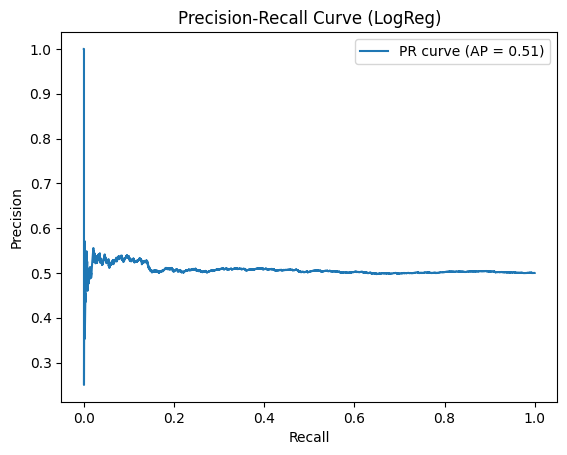

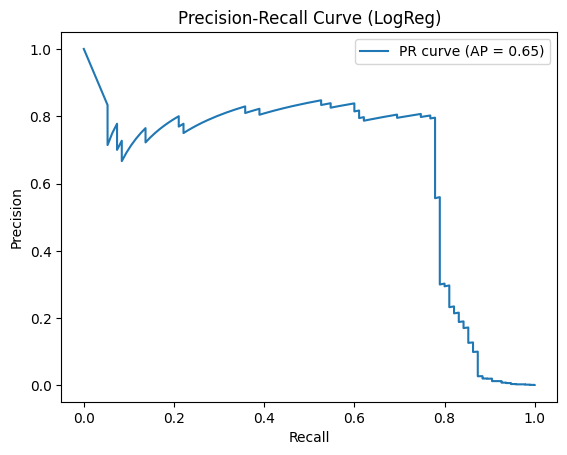

In [ ]:
from src.model_evaluation import plot_precision_recall

# Plot Precision-Recall curve for the Logistic Regression fraud model
from src.model_evaluation import evaluate_model
logreg_fraud_metrics, _, _ = evaluate_model(logreg_fraud_model, X_test, y_test)
plot_precision_recall(y_test, logreg_fraud_proba, logreg_fraud_metrics['pr_auc'], model_name='LogReg Fraud')

# Plot Precision-Recall curve for the Logistic Regression credit model
logreg_credit_metrics, _, _ = evaluate_model(logreg_credit_model, X_test_c, y_test_c)
plot_precision_recall(y_test_c, logreg_credit_proba, logreg_credit_metrics['pr_auc'], model_name='LogReg Credit')



Top 10 Feature Importances (Logistic):
user_id              7.687227e-08
ip_address           6.553038e-12
day_of_week          2.935375e-12
age                  7.568682e-13
purchase_value       2.384337e-13
ip_int               1.815672e-13
hour_of_day          1.503440e-14
transaction_count    0.000000e+00
dtype: float64


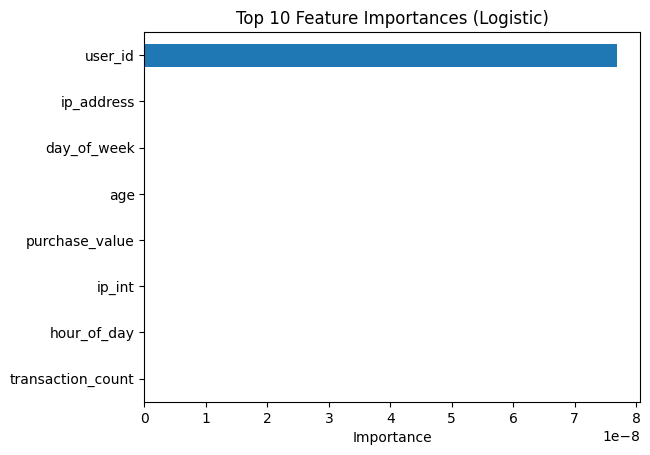


Top 10 Feature Importances (Logistic):
V14       29.930627
V8        28.722895
V10       20.956320
V5        19.932248
V7        18.381568
V12       17.563351
V4        17.517116
V21       16.170049
Amount    15.222776
V22       13.464788
dtype: float64


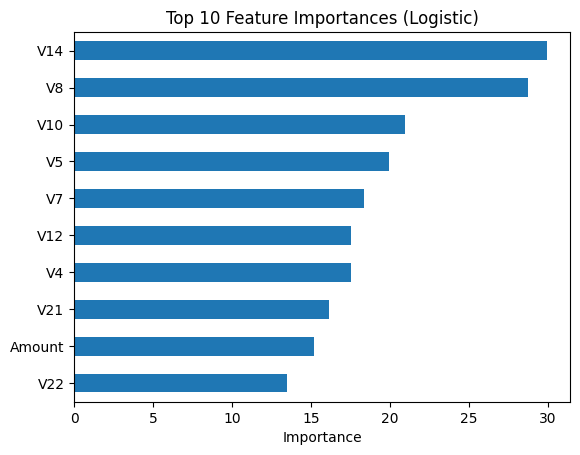

In [27]:
from src.model_evaluation import plot_feature_importance

# Plot feature importance for Logistic Regression fraud model
plot_feature_importance(logreg_fraud_model, logreg_fraud_features, top_n=10, model_type='logistic')

# Plot feature importance for Logistic Regression credit model
plot_feature_importance(logreg_credit_model, logreg_credit_features, top_n=10, model_type='logistic')


#### LightGBM Model Ecvluation For Fraud data and credit data

In [11]:
# Predict probabilities for the test set using the LightGBM fraud model
# Ensure the test set columns match the features used during training
X_test_numeric = X_test[lgbm_fraud_features]
lgbm_fraud_proba = lgbm_fraud_model.predict_proba(X_test_numeric)[:, 1]

# Predict probabilities for the test set using the LightGBM credit model
X_test_c_numeric = X_test_c[lgbm_credit_features]
lgbm_credit_proba = lgbm_credit_model.predict_proba(X_test_c_numeric)[:, 1]


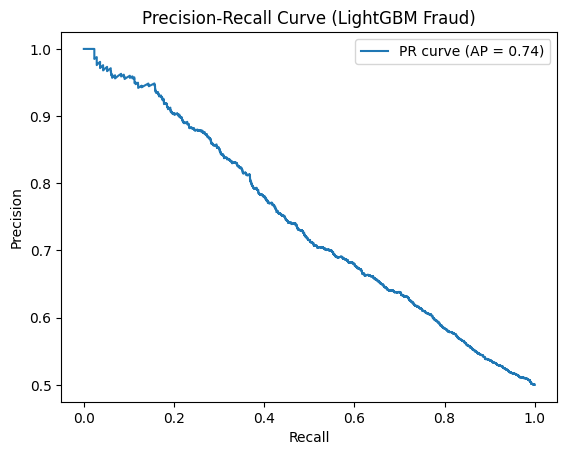

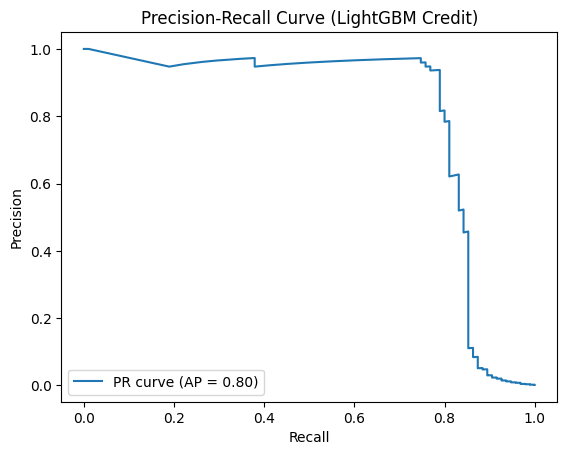

In [12]:
from src.model_evaluation import plot_precision_recall

# Plot Precision-Recall curve for the LightGBM fraud model
from src.model_evaluation import evaluate_model
fraud_metrics, _, _ = evaluate_model(lgbm_fraud_model, X_test, y_test)
plot_precision_recall(y_test, lgbm_fraud_proba, fraud_metrics['pr_auc'], model_name='LightGBM Fraud')

# Plot Precision-Recall curve for the LightGBM credit model
credit_metrics, _, _ = evaluate_model(lgbm_credit_model, X_test_c, y_test_c)
plot_precision_recall(y_test_c, lgbm_credit_proba, credit_metrics['pr_auc'], model_name='LightGBM Credit')



Top 10 Feature Importances (Lightgbm):
ip_address           702
purchase_value       680
age                  514
hour_of_day          460
day_of_week          277
user_id              198
ip_int               169
transaction_count      0
dtype: int32


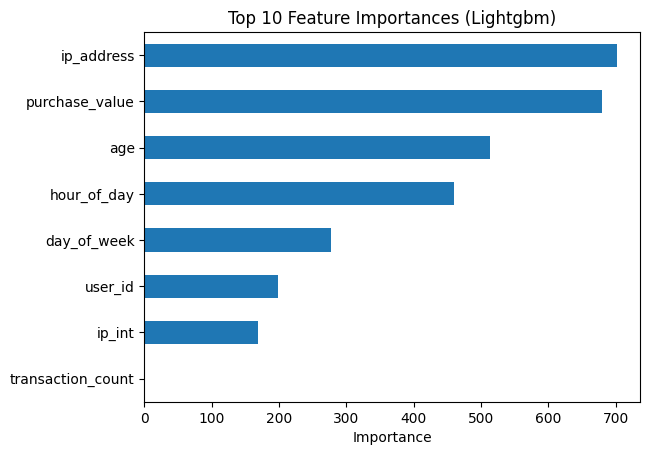


Top 10 Feature Importances (Lightgbm):
V4        220
V14       193
Time      145
V8        144
V3        132
V1        130
V18       129
V26       127
V12       121
Amount    108
dtype: int32


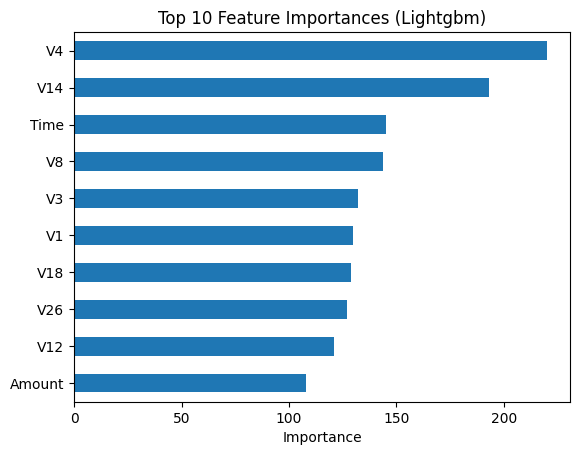

In [28]:
# Plot feature importance for LightGBM fraud model
plot_feature_importance(lgbm_fraud_model, lgbm_fraud_features, top_n=10, model_type='lightgbm')

# Plot feature importance for LightGBM credit model
plot_feature_importance(lgbm_credit_model, lgbm_credit_features, top_n=10, model_type='lightgbm')
